# Respiratory Rate Variability (RRV)

Respiratory Rate Variability (RRV), or variations in respiratory rhythm, are crucial indices of general health and respiratory complications. This example shows how to use NeuroKit to perform RRV analysis.


**I don't have any respiration data :'(**: No problem, see how you can extract **respiration from cardiac activity** (e.g., ECG) in [this example](https://github.com/neuropsychology/NeuroKit/issues/87)  [TODO]

In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

## Download Data and Extract Relevant Signals

In this example, we will download a dataset that contains a recording of physiological signals, and extract the respiratory signal (RSP).

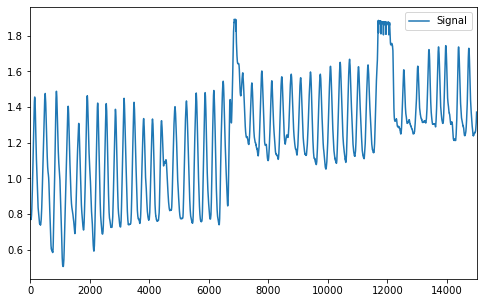

In [3]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/dev/data/bio_eventrelated_100hz.csv")

# Visualize respiration
nk.signal_plot(data["RSP"]) # Visualize

Now that we have the data, we can run the processing routine using `rsp_process()` that will compute the respiration rate and extract the inhalation peaks. The function outputs two things, a dataframe and a dictionnary.

*Note: As the dataset has a frequency of 100Hz, make sure the `sampling_rate` is also set to 100Hz. It is critical that you specify the correct sampling rate of your signal throughout all the processing functions.*

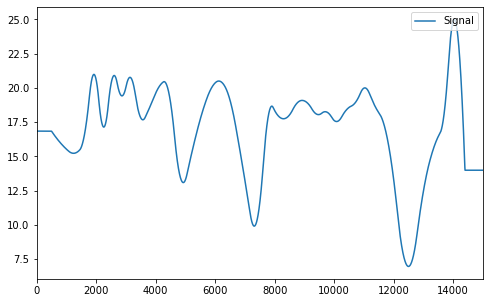

In [4]:
# Extract peaks
data, info = nk.rsp_process(data["RSP"], sampling_rate=100) 

# Visualize respiration rate
nk.signal_plot(data["RSP_Rate"])

## Analyse RRV

Now that we have extracted the respiratory rate and the peaks, we can input these into `rsp_rrv()` to get the RRV indices. 

A Poincaré plot is also shown when setting `show=True`, plotting each breath-to-breath interval against the next successive one. It shows the distribution of successive respiratory rates. This is a simple visualization tool for short-term (SD1) and long-term variability (SD2) in respiratory rhythm.

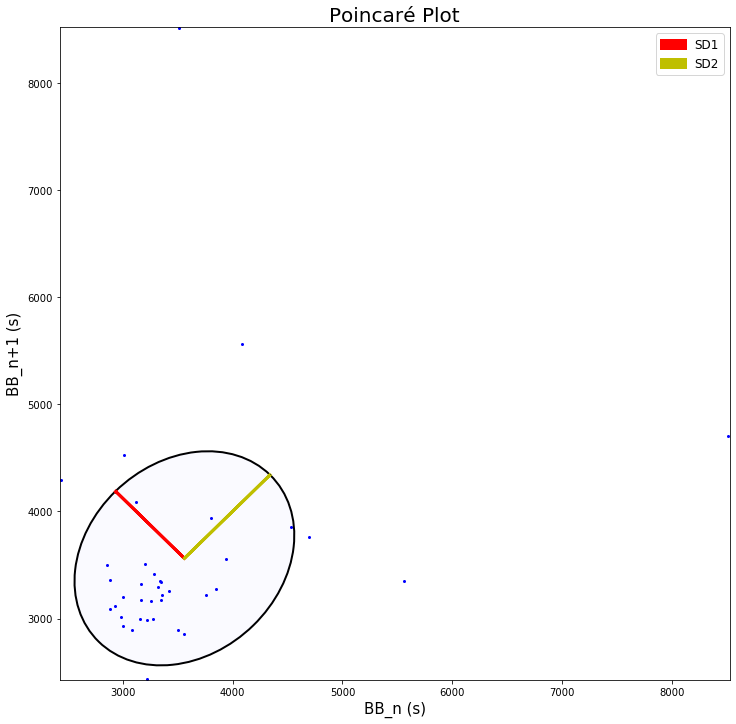

In [5]:
rrv = nk.rsp_rrv(data, info, sampling_rate=100, show=True)

The output of the function is a dataframe containing a variety of RRV indices including time domain, frequency domain, and nonlinear features. Examples of time domain features include RMSSD (root-mean-squared standard deviation) or SDBB (standard deviation of the breath-to-breath intervals). Power spectral analyses (e.g., LF, HF, LFHF) and entropy measures (e.g., sample entropy, SampEn where smaller values indicate that respiratory rate is regular and predictable) are also examples of frequency domain and nonlinear features respectively.

In [6]:
rrv

,RRV_SDBB,RRV_RMSSD,RRV_SDSD,RRV_VLF,RRV_LF,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA
0,998.908514,1235.493722,1252.010077,0.0,1.077982,3.301899,0.326473,0.246121,0.753879,885.304815,1100.850499,1.243471,0.486894,0.705886,0.773903
